<h1>TMDB <h1>
    

    - Part 1: Exploring and Preparing the data for analysis
    - Part 2: Analyses of different genres
    - Part 3: 

<h2> Part 1: Exploring and  preparing the data for analysis:  </h2> 
 We start with the import of packages we will eventually need< Furthermore, we import the datasets and start with exploring and preparing the data for further analysis.

In [1]:
import json

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

movies = pd.read_csv('../dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('../dataset/tmdb_5000_credits.csv')




Let's just start with some easy questions to get familiar with the data. So what does the data look like? We'll start with taking a look at the movies data frame.

In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The first thing we notice is that the columns are a bit in an awkward order to take a fine look at the data. A preferable first column of this data frame, would, for example, be the title of the movie and not the movie's budget. 

We also notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type, so right now they are quite hard to read, but later on we will find a way to work with them.

Amongst the numerical columns, there's a movie budget, a movie ID, popularity, revenue, runtime, a vote average and the amount of votes a movie has received. 

A good description of what the popularity variable should be telling us, is no where to be found, so it will be hard to use this column for our predictions later on. Besides the fact that the ID column is numerical, it is also not of interest for making predictions about, for example, the revenue of a movie. For now, we leave this data frame as it is and we'll take a quick look at the other one.

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


So this data frame has way fewer columns. The cast and crew might be interesting later on. Since this data frame contains only two extra columns, we'll try to merge it with the  movies data frame. If they are in the same order, we can just concatenate the data frames, so let's see if in both data frames every row is about the same movie:

In [4]:
(credits['title']==movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base. To prevent getting duplicate columns, we'll remove the movie_id and title column from the credits data frame and concatenate them.

In [5]:
del credits['title']
del credits['movie_id']
movie_df = pd.concat([movies, credits], axis=1)

In [6]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The concatenation worked. However, the columns are a bit in an awkward order and columns like homepage aren't that interesting for us. We choose the interesting columns, put them in a nice order and create a new data frame

In [7]:
newCols = ['id','title','release_date','popularity','vote_average','vote_count',
           'budget','revenue','genres','keywords','cast','crew','tagline', 'runtime', 'production_companies', 
           'production_countries', 'status']

df2 = movie_df[newCols]
df2.head()

,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,keywords,cast,crew,tagline,runtime,production_companies,production_countries,status
0,19995,Avatar,2009-12-10,150.437577,7.2,11800,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Enter the World of Pandora.,162.0,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
1,285,Pirates of the Caribbean: At World's End,2007-05-19,139.082615,6.9,4500,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","At the end of the world, the adventure begins.",169.0,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
2,206647,Spectre,2015-10-26,107.376788,6.3,4466,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A Plan No One Escapes,148.0,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Released
3,49026,The Dark Knight Rises,2012-07-16,112.312950,7.6,9106,250000000,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Legend Ends,165.0,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
4,49529,John Carter,2012-03-07,43.926995,6.1,2124,260000000,284139100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Lost in our world, found in another.",132.0,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released


Let's explore our data frame a bit more in depth, let's take a look at our numerical columns.

In [8]:
df2.describe().round()

,id,popularity,vote_average,vote_count,budget,revenue,runtime
count,4803.0,4803.0,4803.0,4803.0,4803.0,4.803000e+03,4801.0
mean,57165.0,21.0,6.0,690.0,29045040.0,8.226064e+07,107.0
std,88695.0,32.0,1.0,1235.0,40722391.0,1.628571e+08,23.0
min,5.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,9014.0,5.0,6.0,54.0,790000.0,0.000000e+00,94.0
50%,14629.0,13.0,6.0,235.0,15000000.0,1.917000e+07,103.0
75%,58610.0,28.0,7.0,737.0,40000000.0,9.291719e+07,118.0
max,459488.0,876.0,10.0,13752.0,380000000.0,2.787965e+09,338.0


Note that runtime consists of a few empty values, before we can really work with our data frame, we need to solve this. We use an imputer for this:

In [9]:
my_imputer = Imputer()

temp=df2
X2 = my_imputer.fit_transform(df2[['runtime']])
df2['runtime'] = X2
df2.describe().round()

,id,popularity,vote_average,vote_count,budget,revenue,runtime
count,4803.0,4803.0,4803.0,4803.0,4803.0,4.803000e+03,4803.0
mean,57165.0,21.0,6.0,690.0,29045040.0,8.226064e+07,107.0
std,88695.0,32.0,1.0,1235.0,40722391.0,1.628571e+08,23.0
min,5.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,9014.0,5.0,6.0,54.0,790000.0,0.000000e+00,94.0
50%,14629.0,13.0,6.0,235.0,15000000.0,1.917000e+07,103.0
75%,58610.0,28.0,7.0,737.0,40000000.0,9.291719e+07,118.0
max,459488.0,876.0,10.0,13752.0,380000000.0,2.787965e+09,338.0


So now at least all the numerical columns are complete. Let's take a quick look at how all the variables are distributed.

In [10]:
del df2['id']

In [11]:
#df2['vote_classes'] = pd.cut(df2['vote_average'],10, labels=["1", "2","3","4","5","6","7","8","9","10"])
df2['vote_classes'] = pd.cut(df2['vote_average'],4, labels=["low", "medium-low","medium-high","high"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ca331d68>,
      dtype=object)

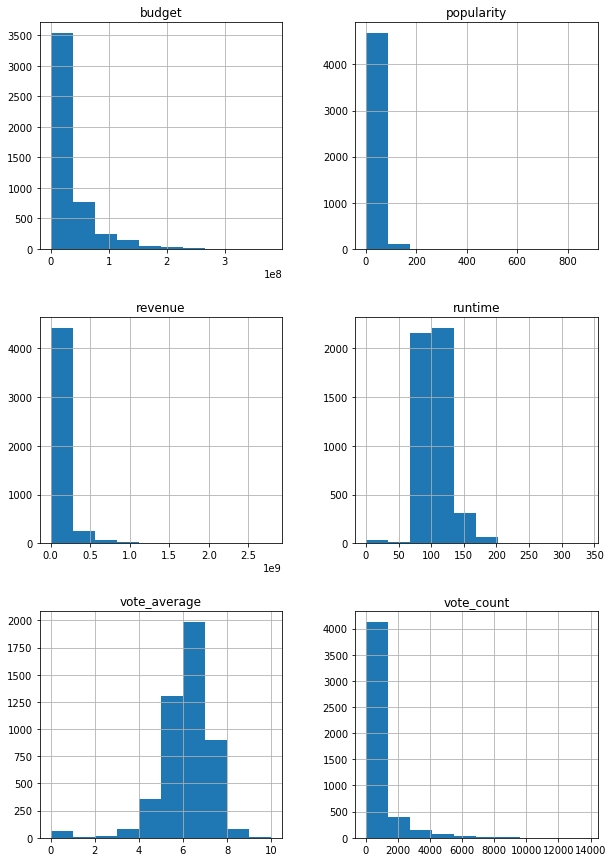

In [12]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()

#fig, axes = plt.subplots(nrows=3, ncols=2)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

#fig.subplots_adjust(hspace=0.1)
df2.hist(ax=ax)
#df2.hist(ax=ax)

Note that everything is quite skewed. We'll try getting more in depth into this later.

<h2> Part 3: Analyze genres: <h2>

Now that we've got a good overview of the distribution of our numerical variables, let's take a closer look at our non-numerical variables. We choose to start with looking at the genres, since this variable has got the least variability, should be the most easy target for analysis.

The genres column contains variables of the string type, while they are in dictionaries. Moreover, the colomn is a json column. To analyse and understand the data it is necessary to change the type of the variable and filter the columns.
Despite the fact that we already loaded our data for the exploration, we'll reload it here and make sure to load the json columns correctly. To do this, we made use of a few tricks found in another Kernel*

In [13]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

credits = load_tmdb_credits("../dataset/tmdb_5000_credits.csv")
movies = load_tmdb_movies("../dataset/tmdb_5000_movies.csv")

del credits['title']
df = pd.concat([movies, credits], axis=1)

df['genres'] = df['genres'].apply(pipe_flatten_names)

liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')


So what happened here is the following: first, we changed the type of the genres variable. Aferwards, we made use of the structure of the column and the *split()* function.  Because the genre always appears after the word *name*, we were able to filter out al the words after the word name and create a list of every genre that occurs in the genre-column.

Now, let's reduce our data frame. To get more insight about the influence of a movie's genre, title, vote_average, release_data, runtime, budget and revenue are the most import important variables. We also add a column for every genre, containing only 1s and 0s whether a movie is of a specific genre or not.  

In [14]:
df_reduced = df[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for genre in liste_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
df_reduced[:5]

df_reduced.head()

,title,vote_average,release_date,runtime,budget,revenue,Mystery,Animation,Crime,War,...,Action,TV Movie,Documentary,Foreign,History,Music,Fantasy,Thriller,Adventure,Family
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Now that we've got an easy to work with data frame for the movie genres, we can take a look to the distribution of the genres by creating a pie chart*. 

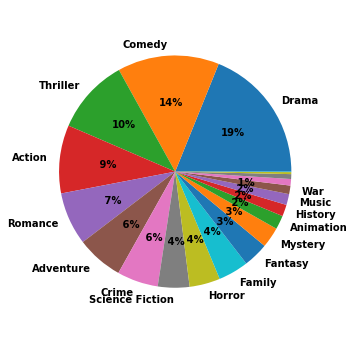

In [15]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df_reduced[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

This pie chart shows which genres are most common in the movies dataset.We find that drama movies are most common, followed by comedy. Afterwards, thriller and action movies are the most popular. Interestingly, half of the movies is from the top 5 genres. (51%). This suggest that the main genre of the most movies are drama, comedy, thriller, action. However, the top 5 most common genres could be seen as more general descriptions. For example, movies with the genre war might also be tagged as action movies or drama movies.

Now let's try to get a more in depth view of the genres. In this cell we calculate the average votes, budget, and revenue for the different genres. we create a new data frame consisiting of every genre and the calculated averages. **

In [16]:
mean_per_genre = pd.DataFrame(liste_genres)

#Mean votes average
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['vote_average'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_votes_average']=newArray2

#Mean budget
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['budget'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_budget']=newArray2

#Mean revenue 
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(df_reduced.groupby(genre, as_index=True)['revenue'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_revenue']=newArray2

mean_per_genre['profit'] = mean_per_genre['mean_revenue']-mean_per_genre['mean_budget']

mean_per_genre    

,0,mean_votes_average,mean_budget,mean_revenue,profit
0,Mystery,6.183908,3.074449e+07,7.830093e+07,4.755644e+07
1,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
2,Crime,6.274138,2.784981e+07,6.615066e+07,3.830085e+07
3,War,6.713889,3.528246e+07,8.415587e+07,4.887342e+07
4,Western,6.178049,2.707870e+07,4.624596e+07,1.916726e+07
5,Comedy,5.945587,2.531342e+07,7.128950e+07,4.597608e+07
6,Romance,6.207718,2.031136e+07,6.000239e+07,3.969103e+07
7,Science Fiction,6.005607,5.186555e+07,1.524565e+08,1.005910e+08
8,Horror,5.626590,1.457403e+07,4.354508e+07,2.897105e+07
9,Drama,6.388594,2.067832e+07,5.211623e+07,3.143791e+07


Let's see which genres are the best scoring ones in each category:

In [17]:
mean_per_genre.sort_values('mean_votes_average', ascending=False).head()


,0,mean_votes_average,mean_budget,mean_revenue,profit
14,History,6.719797,2.990347e+07,5.752356e+07,2.762010e+07
3,War,6.713889,3.528246e+07,8.415587e+07,4.887342e+07
9,Drama,6.388594,2.067832e+07,5.211623e+07,3.143791e+07
15,Music,6.355676,1.590795e+07,4.845595e+07,3.254800e+07
13,Foreign,6.352941,6.580884e+05,3.646515e+05,-2.934369e+05


In [18]:
mean_per_genre.sort_values('mean_budget', ascending=False).head()

,0,mean_votes_average,mean_budget,mean_revenue,profit
1,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
18,Adventure,6.156962,6.632686e+07,2.086602e+08,1.423333e+08
16,Fantasy,6.096698,6.356061e+07,1.933542e+08,1.297936e+08
7,Science Fiction,6.005607,5.186555e+07,1.524565e+08,1.005910e+08
10,Action,5.989515,5.151075e+07,1.412131e+08,8.970235e+07


In [19]:
mean_per_genre.sort_values('mean_revenue', ascending=False).head()

,0,mean_votes_average,mean_budget,mean_revenue,profit
1,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
18,Adventure,6.156962,6.632686e+07,2.086602e+08,1.423333e+08
16,Fantasy,6.096698,6.356061e+07,1.933542e+08,1.297936e+08
19,Family,6.029630,5.071951e+07,1.623455e+08,1.116260e+08
7,Science Fiction,6.005607,5.186555e+07,1.524565e+08,1.005910e+08


In [20]:
mean_per_genre.sort_values('profit', ascending=False).head()

,0,mean_votes_average,mean_budget,mean_revenue,profit
1,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
18,Adventure,6.156962,6.632686e+07,2.086602e+08,1.423333e+08
16,Fantasy,6.096698,6.356061e+07,1.933542e+08,1.297936e+08
19,Family,6.029630,5.071951e+07,1.623455e+08,1.116260e+08
7,Science Fiction,6.005607,5.186555e+07,1.524565e+08,1.005910e+08


It's very interesting to see that the top 5 highest vote average consists of *History, War, Drama, Music* and *Foreign*, while none of these genres are in either one of the other three categories, which all have the same top 3: *Animation, Adventure, Fantasy*. On the one hand, this is easily explained, since budget and revenue should be closely elated and profit is directly derived from budget and revenue. However, we would have expected a higher correlation between the budget and the quality of a movie.

To go even more in depth, we want to analyse the averages per genre per year.  Therefore, we first extend the dataframe. with the year of release per movie.  Afterwards, we create a new dataframe which contains the average votes, average runtime, and average budget per release year and per genre. 

In the last step in the cell below, only the rows that contain a 1 for genre are kept, so we create a data frame with only the specific genres. 

In [21]:
from datetime import datetime

t = df_reduced['release_date']
t = pd.to_datetime(t)
t = t.dt.year
df_reduced['release_year'] = t

df_list = []*len(liste_genres)
for genre in liste_genres:
    df_list.append(df_reduced.groupby([genre,'release_year']).mean().reset_index())

df_per_genre = []*len(liste_genres)
for i in range(len(df_list)):
    df_per_genre.append(df_list[i][df_list[i].ix[:,0] == 1])


Now we create tables which contain the average budget, average revenue, and average votes per year per genre. We start with creating a new table with the cloumns 1988 till 2017. Afterwards, the data for the different variables is implemented. **

In [22]:
# Budget
columns = range(1988,2018)
budget_genre = pd.DataFrame( columns = columns)

for genre in liste_genres:
    temp=(df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'budget', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    budget_genre.loc[liste_genres.index(genre)]=temp
budget_genre['genre']=liste_genres

# Revenue 

columns = range(1988,2018)
revenue_genre = pd.DataFrame( columns = columns)

for genre in liste_genres:
    temp=(df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'revenue', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    revenue_genre.loc[liste_genres.index(genre)]=temp
revenue_genre['genre']=liste_genres

# Vote average 
columns = range(1988,2018)
vote_avg_genre = pd.DataFrame( columns = columns)

for genre in liste_genres:
    temp=(df_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'vote_average', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    vote_avg_genre.loc[liste_genres.index(genre)]=temp
vote_avg_genre['genre']=liste_genres

#vote_avg_genre.index = vote_avg_genre['genre']

Let's take a look at the data frames we generated.

### Mean budget per genre per year:

In [23]:
budget_genre.index = budget_genre['genre']
budget_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,1.900000e+07,3.550000e+07,NaN,1.250000e+07,4.366667e+07,2.580000e+07,3.875000e+07,4.750000e+07,3.801500e+07,...,2.591924e+07,3.507574e+07,4.256688e+07,2.800000e+07,4.270000e+07,2.789267e+07,2.315000e+07,2.425000e+07,NaN,Mystery
Animation,1.015000e+07,NaN,NaN,NaN,2.800000e+07,2.800000e+07,4.500000e+07,4.250000e+07,4.800000e+07,3.716667e+07,...,7.900000e+07,9.184615e+07,8.717647e+07,8.334743e+07,7.844118e+07,6.464286e+07,7.092308e+07,7.800000e+07,NaN,Animation
Crime,1.282500e+07,2.300000e+07,4.375000e+07,1.641667e+07,1.523869e+07,2.187500e+07,2.776923e+07,2.631250e+07,2.217647e+07,3.463487e+07,...,2.304330e+07,2.426559e+07,3.657083e+07,3.061967e+07,3.291946e+07,2.157185e+07,3.630000e+07,4.017500e+07,NaN,Crime
War,6.300000e+07,1.366667e+07,NaN,NaN,4.000000e+07,1.100000e+07,3.500000e+07,3.566667e+07,3.650000e+07,NaN,...,3.300000e+07,2.505785e+07,3.985000e+07,3.500000e+07,1.666667e+07,4.860000e+07,3.000000e+07,3.333333e+07,NaN,War
Western,1.300000e+07,NaN,1.100000e+07,NaN,1.400000e+07,2.500000e+07,6.300000e+07,3.200000e+07,NaN,NaN,...,NaN,2.740000e+07,4.500000e+07,5.000000e+07,2.550000e+08,5.666667e+06,3.571429e+07,2.500000e+07,NaN,Western
Comedy,1.050000e+07,1.554167e+07,2.429318e+07,2.409091e+07,2.566667e+07,1.822143e+07,1.955873e+07,1.801087e+07,2.042432e+07,1.708281e+07,...,2.536214e+07,3.265785e+07,3.292033e+07,2.931458e+07,2.476088e+07,2.936936e+07,3.171538e+07,3.951923e+07,0.0,Comedy
Romance,1.066667e+07,1.333333e+07,1.320000e+07,1.100000e+07,2.524365e+07,1.249091e+07,3.022222e+07,2.091765e+07,2.131905e+07,2.458333e+07,...,1.874380e+07,2.892811e+07,2.374046e+07,1.844744e+07,1.796889e+07,2.831250e+07,1.733043e+07,1.377778e+07,NaN,Romance
Science Fiction,8.750000e+06,3.000000e+07,3.380000e+07,3.160000e+07,2.160000e+07,1.942857e+07,2.900000e+07,3.800000e+07,5.133333e+07,5.447368e+07,...,7.679688e+07,5.022895e+07,5.538656e+07,7.196136e+07,8.151852e+07,7.793462e+07,7.628304e+07,1.045455e+08,NaN,Science Fiction
Horror,4.733333e+06,6.083333e+06,2.000000e+07,2.050000e+07,2.050000e+07,1.666667e+06,2.900000e+07,1.000000e+07,2.250000e+07,3.990200e+07,...,1.178334e+07,1.639074e+07,1.572576e+07,1.151394e+07,1.675803e+07,1.102143e+07,4.919697e+06,9.720000e+06,NaN,Horror


### Mean revenue per genre per year:

In [24]:
revenue_genre.index = revenue_genre['genre']
revenue_genre


,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,1.108795e+08,2.627117e+08,NaN,1.072523e+07,2.781307e+08,9.138758e+07,1.499534e+08,1.062594e+08,6.935287e+07,...,6.984452e+07,1.020497e+08,1.169212e+08,7.414954e+07,8.405029e+07,7.715577e+07,3.866913e+07,9.781144e+07,NaN,Mystery
Animation,4.250701e+07,NaN,NaN,NaN,5.040502e+08,6.692760e+05,7.882418e+08,3.598169e+08,8.758471e+07,1.009154e+08,...,2.433655e+08,3.199310e+08,2.466578e+08,2.754644e+08,3.010980e+08,2.201954e+08,3.140907e+08,4.719153e+08,NaN,Animation
Crime,2.593798e+07,5.225724e+07,7.694114e+07,1.049300e+08,8.962918e+07,7.733952e+07,1.219430e+08,7.811012e+07,4.683539e+07,6.534840e+07,...,4.865874e+07,4.074380e+07,9.365526e+07,9.149609e+07,6.650704e+07,4.022622e+07,7.479586e+07,1.388020e+08,NaN,Crime
War,1.890156e+08,6.261002e+07,NaN,NaN,7.550586e+07,1.731828e+08,9.248560e+07,7.500000e+07,1.664186e+08,NaN,...,1.104578e+08,3.907929e+07,4.650904e+07,6.581907e+07,4.976520e+07,1.874737e+08,5.321016e+07,3.148244e+07,NaN,War
Western,4.472664e+07,NaN,2.121044e+08,NaN,1.591574e+08,5.650506e+07,2.505200e+07,1.855246e+07,NaN,NaN,...,NaN,5.495596e+07,8.211604e+07,2.126841e+08,8.928991e+07,1.147618e+06,9.841996e+07,1.397284e+06,NaN,Western
Comedy,8.140686e+07,6.035897e+07,1.473084e+08,6.829757e+07,1.491277e+08,6.554884e+07,9.474867e+07,7.218928e+07,3.591524e+07,5.855068e+07,...,6.965731e+07,7.815022e+07,8.864117e+07,8.750149e+07,8.276906e+07,1.068331e+08,1.199000e+08,1.359984e+08,0.0,Comedy
Romance,6.211316e+07,3.094118e+07,2.074307e+08,1.939886e+07,1.950059e+08,2.854121e+07,2.126254e+08,4.045968e+07,5.061994e+07,1.278945e+08,...,5.463998e+07,7.386076e+07,6.911425e+07,7.524173e+07,4.219857e+07,7.939355e+07,7.118764e+07,4.963900e+07,NaN,Romance
Science Fiction,8.674738e+06,1.067135e+08,1.279649e+08,1.391539e+08,4.259434e+07,1.390742e+08,7.662750e+07,9.667365e+07,1.668067e+08,1.224596e+08,...,2.381428e+08,1.541972e+08,1.669972e+08,2.280335e+08,2.662696e+08,2.908823e+08,2.588725e+08,3.323677e+08,NaN,Science Fiction
Horror,2.093621e+07,1.754668e+07,3.435932e+07,1.131872e+08,7.415122e+07,5.330757e+06,8.319183e+07,2.671513e+07,4.760999e+07,8.983488e+07,...,3.082346e+07,4.421287e+07,3.788669e+07,3.778651e+07,7.184334e+07,4.408987e+07,2.068814e+07,4.222806e+07,NaN,Horror


### Mean vote average per genre per year:

In [25]:
vote_avg_genre.index = vote_avg_genre['genre']
vote_avg_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,6.700000,6.550000,NaN,7.500000,6.700000,6.320000,5.975000,6.316667,6.705556,...,6.107143,6.329412,6.212500,5.737500,6.240000,5.440000,5.505000,6.466667,NaN,Mystery
Animation,7.400000,NaN,NaN,NaN,7.400000,6.800000,8.000000,7.200000,6.200000,7.566667,...,6.480000,6.300000,5.882353,6.176923,6.323529,6.078571,6.476923,6.025000,NaN,Animation
Crime,6.350000,6.166667,6.850000,6.683333,6.490909,6.487500,6.338462,6.300000,6.305882,6.387500,...,6.021875,6.123333,6.295833,5.955556,6.183784,5.762963,5.419231,5.550000,NaN,Crime
War,5.700000,7.166667,NaN,NaN,7.100000,7.450000,6.550000,7.100000,6.600000,NaN,...,7.050000,6.900000,6.200000,6.100000,5.766667,6.790000,7.250000,6.466667,NaN,War
Western,6.600000,NaN,7.050000,NaN,7.700000,7.400000,6.500000,6.300000,NaN,NaN,...,NaN,6.220000,5.700000,6.650000,5.900000,5.133333,5.185714,5.400000,NaN,Western
Comedy,6.140000,6.358333,6.327273,5.972727,6.575000,6.264286,6.261538,6.273913,6.054054,6.228947,...,5.852577,5.779310,5.924390,5.751250,6.073239,5.945161,6.017308,5.592308,7.4,Comedy
Romance,6.600000,6.966667,6.840000,5.700000,6.700000,6.945455,6.533333,6.317647,6.133333,6.176190,...,6.129825,6.055556,6.180000,6.238462,6.540000,6.270833,6.352174,5.944444,NaN,Romance
Science Fiction,6.625000,6.540000,6.220000,6.140000,5.740000,5.985714,5.450000,5.540000,5.822222,5.721053,...,5.878125,5.947368,6.065385,6.068182,6.259259,6.088462,5.807143,6.118182,NaN,Science Fiction
Horror,6.022222,5.500000,5.300000,5.900000,6.266667,5.100000,6.666667,5.583333,6.000000,6.020000,...,5.706667,5.529630,5.412500,5.181818,5.208000,4.914286,4.984848,5.600000,NaN,Horror


We can create more insight in these tables by making heatmaps**. 

### Budget:

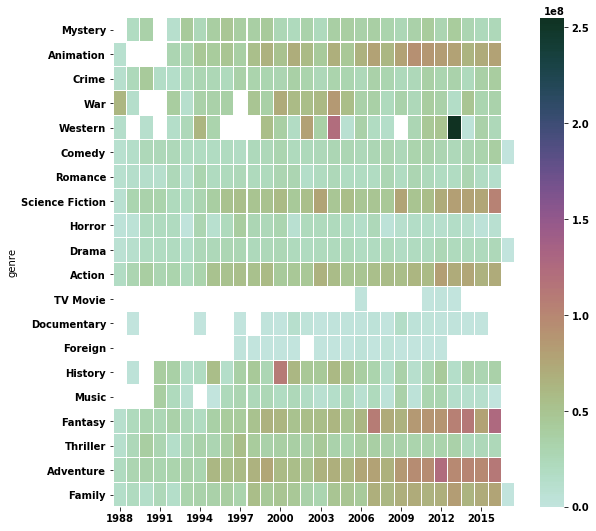

In [26]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(budget_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

The heatmap shows that in general, movies had  an increasing budget over the years. Especially the genres Fantasy, advernture, family, action, science fiction, and animation. The heatmap also shows that Western movies had an extremely high budget in 2013. This could mean that a costly movie is produced in 2013 which has great influence on the average.  We might later on remove this possible outlier, to get a better overview of the distribution of the rest of the movies.

## Revenue:

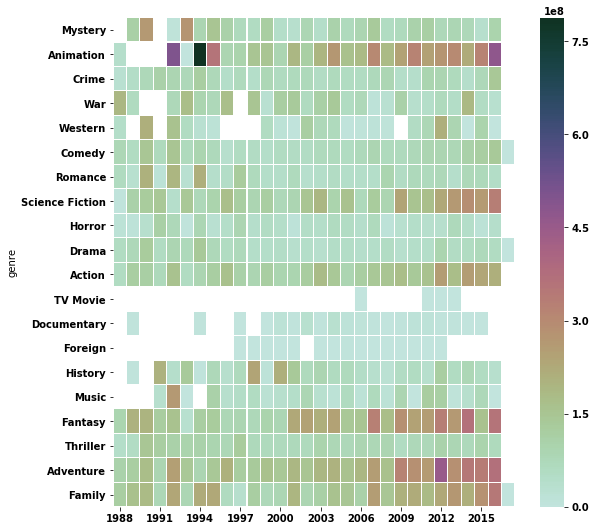

In [27]:

fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(revenue_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

This heatmap shows the average revenue of genres from 1988 till 2017. The most clear increase of average is in the genres fantasy, adventure, family, action, science fiction. Interestingly, the graph shows that the revenues of the genre animation are colored black in 1994. This is surprisingly because there are no black colored revenues in the graph and in general revenues are lower in 1994 than movies that are produced in later years.  A reason for this could be that there are only a few movies in the genre animation in 1994 and that those movies did extremely well.  The previous heatmap does not show an above average budget for animation movies in 1994. 


## Vote average:

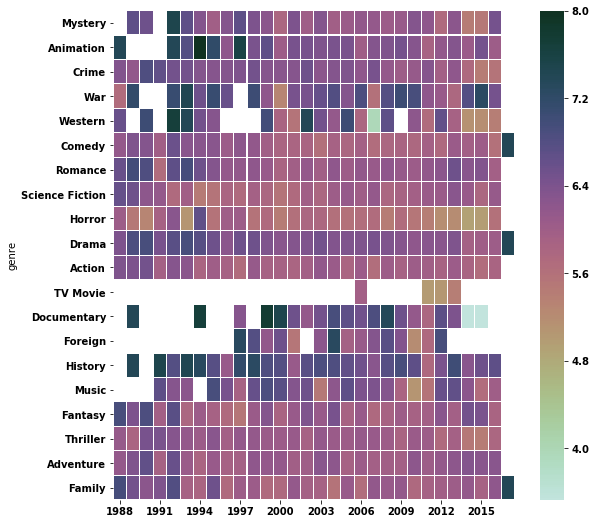

In [28]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(vote_avg_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

This heatmap is way darker than the previous two, which suggests that the average is relatively higher than in the other two categories. Most of the categories seem to be getting somewhere around a 6 out of 10 score. Especially notable is the fact that there are very few green or orange colored cells, which should mean that the most movies are on average just a nice watch.

As said before, we would like to remove the very high budget input from the Western genre, to make the heatmap less skewed. Let's see what happens:

In [29]:
temp = budget_genre
temp[2013]=temp[2013].replace(2.550000e+08, 0)

This heatmap obviously shows that Fantasy Adventure, Science Fiction, and Animation have on average the highest budget. It is also clear that movies had an increasing budget over the years. However, there are a few exceptions. For example  Western movies had an above average budget in 2004 and history in 2000. This might be an effect of individual movies with a high budget. 

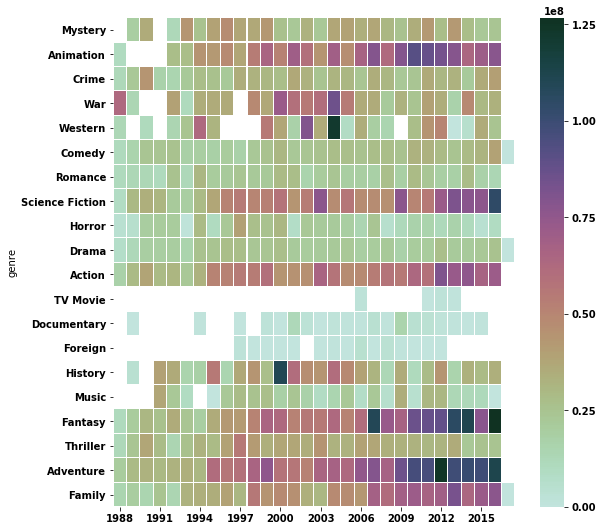

In [30]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(temp.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

## It might also be nice to create a visualisation on how many times different genres are connected with each other. So which genres occur the most together in the same movie, but this is something for later on.

# Numerical Analysis

So let's take a closer look at our the numerical columns in our data frame.  Let's start by creating a data frame containing only numbered columns.

In [31]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movie_num = df2[num_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


Let's take a look at how everything is correlated:

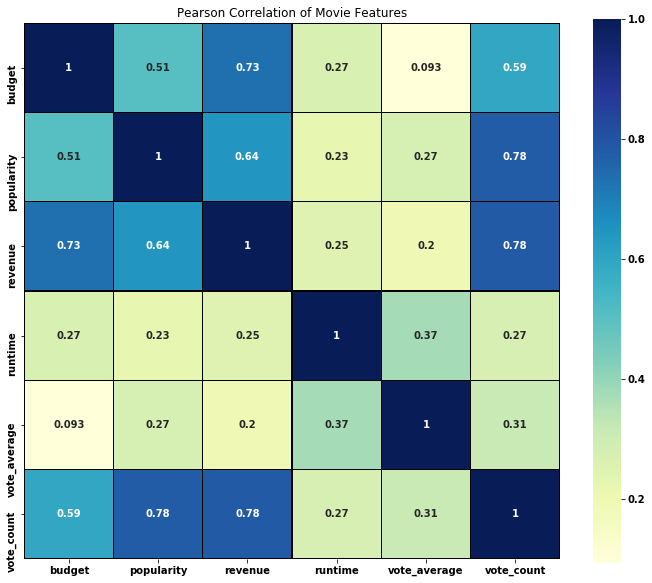

In [32]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

We see quite a few dark/blue squares. These are the higher correlated variables. To be able to make predictions about certain movies later on, this might be some important knowledge.

# Comparing different regression techniques

We want to compare a few regression techniques to help us in making predictions. We'll use linear regression and random forest, as treated in the lectures.
We start by recreating our numerical data frame.

In [33]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movie_num = df2[num_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


We want the vote_average to be our target values, budget, popularity, revenue, runtime and vote_count are trainng values.

In [34]:
training_list = ['budget','popularity','revenue','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

In [35]:
X = training.values
y = target.values

We split our data in a train and a test frame.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Now let's train a linear regression model and plot the results: \***

In [37]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

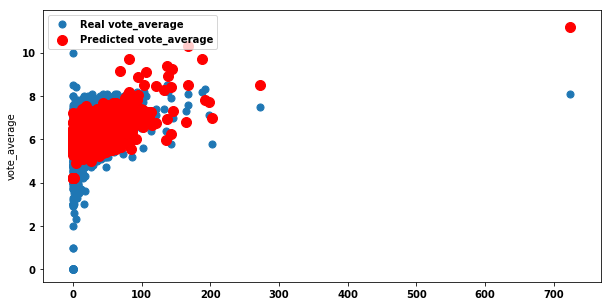

In [38]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_lr,s=100, c='r',label="Predicted vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

Now let's see what happens if we use a random forest regression model:

In [39]:
from sklearn.ensemble import RandomForestRegressor
# Create linear regression object
rf = RandomForestRegressor(1)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)

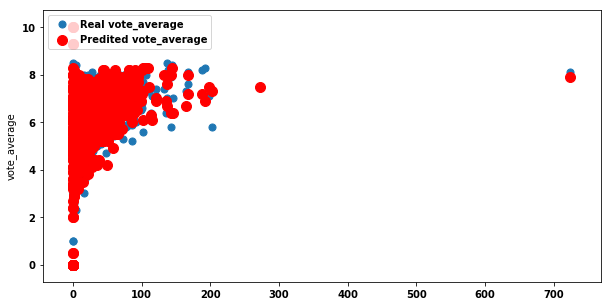

In [40]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_rf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

And let's compare them:

In [41]:
from sklearn.metrics import mean_squared_error

error_lr = mean_squared_error(y_test,y_pred_lr)
error_rf = mean_squared_error(y_test,y_pred_rf)

print(error_lr)
print(error_rf)

1.0803812683692218
1.1922902208201893


No handles with labels found to put in legend.


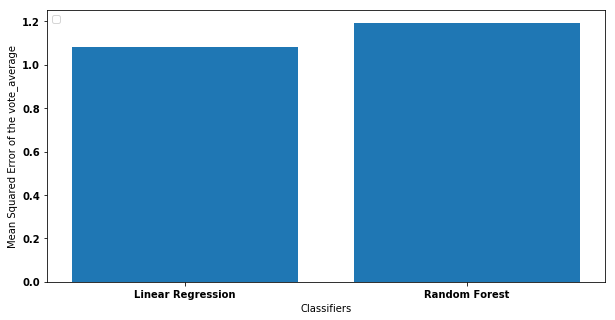

In [42]:
f = plt.figure(figsize=(10,5))
plt.bar(range(2),[error_lr,error_rf])
plt.xlabel("Classifiers");
plt.ylabel("Mean Squared Error of the vote_average");
plt.xticks(range(2),['Linear Regression','Random Forest'])
plt.legend(loc=2);

So the mean squared error for the random forest regression is a little higher than for the linear regression, but both estimators seem to be very decent.

\* https://www.kaggle.com/fabiendaniel/categorizing-actors-hands-on-plotly <br>
\** https://www.kaggle.com/diegoinacio/imdb-genre-based-analysis <br>
\*** introduction to data science, week 4, Comparison of Regression Techniques on House prediction prices.ipynb

**ROBBERT**

In [43]:

import nltk
from nltk.corpus import wordnet
PS = nltk.stem.PorterStemmer()

import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

# Country Analysis<br>
We are interested in the following question: What countries produce the most movies?[](http://)


In [ ]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#____________________________
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#_______________________________________
def safe_access(container, index_values):
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan
#_______________________________________
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']
#_______________________________________
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'revenue',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}
#_______________________________________     
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}
#_______________________________________
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])
#_______________________________________
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])
#_______________________________________
def convert_to_original_format(movies, credits):
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [ ]:
#______________
# the packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
#___________________
# and the dataframe
credits = load_tmdb_credits("../input/tmdb_5000_credits.csv")
movies = load_tmdb_movies("../input/tmdb_5000_movies.csv")
df = convert_to_original_format(movies, credits)
#___________________________
# countries in the dataframe
df['country'].unique()


In [ ]:
df['country'].describe()

In [ ]:
#Extract number of films per country
df_countries = df['title_year'].groupby(df['country']).count()
df_countries = df_countries.reset_index()
df_countries.rename(columns ={'title_year':'count'}, inplace = True)
df_countries = df_countries.sort_values('count', ascending = False)
df_countries.reset_index(drop=True, inplace = True)

#Create pie chart with number of films per country
sns.set_context("poster", font_scale=0.6)
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [s[0] if s[1] > 80 else ' ' 
          for index, s in  df_countries[['country', 'count']].iterrows()]
sizes  = df_countries['count'].values
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(df_countries))]
ax.pie(sizes, explode = explode, labels = labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=45)
ax.axis('equal')
ax.set_title('% of films per country',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);

As one would have expected, most of the movies were created in the united states.

In [ ]:
#Create a chloropleth map
data = dict(type='choropleth',
locations = df_countries['country'],
locationmode = 'country names', z = df_countries['count'],
text = df_countries['country'], colorbar = {'title':'Films nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Number of films in the TMDB database',
geo = dict(showframe = True, projection={'type':'Mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

# Keyword Analysis
### Part 1: Cleaning the data
For the analysis of the keywords, we will be using the same method we applied in the genre analysis. However, before it is possible for us to analyze the data, it needs a lot of cleaning. To clean the data, we use the same method as applied in this notebook: https://www.kaggle.com/fabiendaniel/film-recommendation-engine.

In [ ]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

credits = load_tmdb_credits("../input/tmdb_5000_credits.csv")
movies = load_tmdb_movies("../input/tmdb_5000_movies.csv")

del credits['title']
df = pd.concat([movies, credits], axis=1)

df['keywords'] = df['keywords'].apply(pipe_flatten_names)

liste_keywords = set()
for s in df['keywords'].str.split('|'):
    liste_keywords = set().union(s, liste_keywords)
liste_keywords = list(liste_keywords)
liste_keywords.remove('')

We are interested in which keywords occur the most in our dataset. We use the following function to count them.


In [ ]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(df, 'keywords', liste_keywords)
keyword_occurences[:5]

In [ ]:
# Collect the keywords
def keywords_inventory(dataframe, colonne = 'keywords'):
    PS = nltk.stem.PorterStemmer()
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower() ; racine = PS.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
            else:
                keywords_roots[racine] = {t}
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select

keywords, keywords_roots, keywords_select = keywords_inventory(df, colonne = 'keywords')

Of course, different movies use different keywords for their movies. A problem is, that often a lot of those keywords are the same, although they are communicated in a different form by the different movie producers. The function above inventorizes the different keywords using nltk. The package identifies the 'roots' of different words and groups the different words according to its root. Then, we can replace the words that have a common root with their root. In this way, similar words that are phrased differently are assigned a common 'root'.

When executing the function, it also shows the amount of different keywords, 9474 in our case.

### Roots

In [ ]:
# Plot of a sample of keywords that appear in close varieties
# Different words with similar roots
icount = 0
for s in keywords_roots.keys():
    if len(keywords_roots[s]) > 1: 
        icount += 1
        if icount < 15: print(icount, keywords_roots[s], len(keywords_roots[s]))

In [ ]:
#Each different form of a word will be replaced by their roots

def remplacement_df_keywords(df, dico_remplacement, roots = False):
    df_new = df.copy(deep = True)
    for index, row in df_new.iterrows():
        chaine = row['keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            clef = PS.stem(s) if roots else s
            if clef in dico_remplacement.keys():
                nouvelle_liste.append(dico_remplacement[clef])
            else:
                nouvelle_liste.append(s)       
        df_new.set_value(index, 'keywords', '|'.join(nouvelle_liste)) 
    return df_new

#The cleaned keywords will be stored in a new dataframe
df_keywords_cleaned = remplacement_df_keywords(df, keywords_select, roots = True)

### Synonyms
We use the nltk package to get rid of synonyms. 

In [ ]:
#The function below takes a word as a parameter and returns all of the synonyms of that word according to the nltk package.
def get_synonymes(word):
    lemma = set()
    for ss in wordnet.synsets(word):
        for w in ss.lemma_names():
            # We just get the 'nouns':
            index = ss.name().find('.')+1
            if ss.name()[index] == 'n': lemma.add(w.lower().replace('_',' '))
    return lemma  
#__________________________________________________________________________
def test_keyword(mot, key_count, threshold):
    return (False , True)[key_count.get(mot, 0) >= threshold]

#__________________________________________________________________________
keyword_occurences.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_occurences:
    key_count[s[0]] = s[1]

# Creation of a dictionary to replace keywords by higher frequency keywords
remplacement_mot = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate(keyword_occurences):
    if nb_apparitions > 5: continue  # only the keywords that appear less than 5 times
    lemma = get_synonymes(mot)
    if len(lemma) == 0: continue     # case of the plurals
    liste_mots = [(s, key_count[s]) for s in lemma 
                  if test_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(liste_mots) <= 1: continue       # no replacement
    if mot == liste_mots[0][0]: continue    # replacement by himself
    icount += 1
    if  icount < 8:
        print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))    
    remplacement_mot[mot] = liste_mots[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'
      .format(round(len(remplacement_mot)/len(keywords)*100,2)))


In [ ]:
# 2 successive replacements
print('Keywords that appear both in keys and values:'.upper()+'\n'+45*'-')
icount = 0
for s in remplacement_mot.values():
    if s in remplacement_mot.keys():
        icount += 1
        if icount < 10: print('{:<20} -> {:<20}'.format(s, remplacement_mot[s]))

for key, value in remplacement_mot.items():
    if value in remplacement_mot.keys():
        remplacement_mot[key] = remplacement_mot[value]

In [ ]:
# replacement of keyword varieties by the main keyword
df_keywords_synonyms = remplacement_df_keywords(df_keywords_cleaned, remplacement_mot, roots = False)   
keywords, keywords_roots, keywords_select = keywords_inventory(df_keywords_synonyms, colonne = 'keywords')

In [ ]:
# New count of keyword occurences
keywords.remove('')
new_keyword_occurences, keywords_count = count_word(df_keywords_synonyms,'keywords',keywords)
new_keyword_occurences[:5]

In [ ]:
# deletion of keywords with low frequencies
def remplacement_df_low_frequency_keywords(df, keyword_occurences):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences: 
        key_count[s[0]] = s[1]    
    for index, row in df_new.iterrows():
        chaine = row['keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            if key_count.get(s, 4) > 3: nouvelle_liste.append(s)
        df_new.set_value(index, 'keywords', '|'.join(nouvelle_liste))
    return df_new

# Creation of a dataframe where keywords of low frequencies are suppressed
df_keywords_occurence = remplacement_df_low_frequency_keywords(df_keywords_synonyms, new_keyword_occurences)
df2 = df_keywords_occurence
keywords, keywords_roots, keywords_select = keywords_inventory(df2, colonne = 'keywords')   

We see a drastic decrease in different keywords

In [ ]:
#Show the 50 most occuring keywords in a histogram
fig = plt.figure(1, figsize=(18,13))
trunc_occurences = new_keyword_occurences[0:50]
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

### Part 2: Analysis

For our analysis of the keywords, not every single column is relevent, so we remove a couple of columns from the dataset, the same way we did before. We also add a column for every single keyword, containing a 1 or 0 depending on whether that keyword belongs to a specific movie or not.

Then, we are interested in computing the means of several categories for all the keywords, the same way as we did with the genres.


In [ ]:
liste_keywords = set()
for s in df2['keywords'].str.split('|'):
    liste_keywords = set().union(s, liste_keywords)
liste_keywords = list(liste_keywords)
liste_keywords.remove('')

df_reduced = df2[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for keywords in liste_keywords:
    df_reduced[keywords] = df2['keywords'].str.contains(keywords).apply(lambda x:1 if x else 0)
df_reduced.head()


In [ ]:
#Brackets in the name of the keyword are not allowed in our way of computing the mean --> remove them.
#We identified three keywords containing brackets, we remove them as follows:
liste_keywords.remove('national security agency (nsa)')
liste_keywords.remove('middle-earth (tolkien)')
liste_keywords.remove('lover (female)')

Now, we use the exact same way as we did with the genres to compute several averages for the keywords.

In [ ]:
mean_per_keywords = pd.DataFrame(liste_keywords)

#Mean votes average
newArray = []*len(liste_keywords)
for keywords in liste_keywords:
    newArray.append(df_reduced.groupby(keywords, as_index=True)['vote_average'].mean())
newArray2 = []*len(liste_keywords)
for i in range(len(liste_keywords)):
    # print(newArray[i][1], i)
    newArray2.append(newArray[i][1])

mean_per_keywords['mean_votes_average']=newArray2

#Mean budget
newArray = []*len(liste_keywords)
for keywords in liste_keywords:
    newArray.append(df_reduced.groupby(keywords, as_index=True)['budget'].mean())
newArray2 = []*len(liste_keywords)
for i in range(len(liste_keywords)):
    newArray2.append(newArray[i][1])

mean_per_keywords['mean_budget']=newArray2

#Mean revenue 
newArray = []*len(liste_keywords)
for keywords in liste_keywords:
    newArray.append(df_reduced.groupby(keywords, as_index=True)['revenue'].mean())
newArray2 = []*len(liste_keywords)
for i in range(len(liste_keywords)):
    newArray2.append(newArray[i][1])

mean_per_keywords['mean_revenue']=newArray2

mean_per_keywords['profit'] = mean_per_keywords['mean_revenue']-mean_per_keywords['mean_budget']

mean_per_keywords.head()

For every category the five largerst mean are shown.

In [ ]:
mean_per_keywords.sort_values('mean_votes_average', ascending=False).head()

In [ ]:
mean_per_keywords.sort_values('mean_budget', ascending=False).head()

In [ ]:
mean_per_keywords.sort_values('mean_revenue', ascending=False).head()

In [ ]:
mean_per_keywords.sort_values('profit', ascending=False).head()

We can further visualize our findings using bar plots. 


In [ ]:
#In order to to get a good visualisation we restructure our dataframe a little bit.
mean_per_keywords.index = mean_per_keywords.loc[:,0]
mean_per_keywords = mean_per_keywords.drop(0,axis=1)

In [ ]:
df = mean_per_keywords.sort_values('mean_votes_average', ascending=False)
df = df[0:50]
fig = plt.figure(1, figsize=(18,13))

import matplotlib.pyplot as plt
ax = df['mean_votes_average'].plot(kind='bar', title ="mean_vote_average", figsize=(15, 4), legend=True, fontsize=12, color='green')
ax.set_xlabel("Keyword", fontsize=12)
ax.set_ylabel("mean_votes_average", fontsize=12 )
ax.set_ylim([7.2,7.7])
plt.show()

In [ ]:
df = mean_per_keywords.sort_values('mean_budget', ascending=False)
df = df[0:50]
fig = plt.figure(1, figsize=(18,13))

import matplotlib.pyplot as plt
ax = df['mean_budget'].plot(kind='bar', title ="mean_budget", figsize=(15, 4), legend=True, fontsize=12, color='red')
ax.set_xlabel("Keyword", fontsize=12)
ax.set_ylabel("mean_budget", fontsize=12)
ax.set_ylim([1e+08 , 2.2e+08])
plt.show()

In [ ]:
df = mean_per_keywords.sort_values('mean_revenue', ascending=False)
df = df[0:50]
fig = plt.figure(1, figsize=(18,13))

import matplotlib.pyplot as plt
ax = df['mean_revenue'].plot(kind='bar', title ="mean_revenue", figsize=(15, 4), legend=True, fontsize=12, color='blue')
ax.set_xlabel("Keyword", fontsize=12)
ax.set_ylabel("mean_revenue", fontsize=12)
ax.set_ylim([4e+08 , 10e+08])
plt.show()

In [ ]:
df = mean_per_keywords.sort_values('profit', ascending=False)
df = df[0:50]
fig = plt.figure(1, figsize=(18,13))

import matplotlib.pyplot as plt
ax = df['profit'].plot(kind='bar', title ="Profit", figsize=(15, 4), legend=True, fontsize=12, color='pink')
ax.set_xlabel("Keyword", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
ax.set_ylim([3e+08 , 8e+08])
plt.show()

## Cast Analysis
A previous version of this dataset only contained the top three actors per movie. Since we only want to analyze the most important actors of a movie and since the old dataset was a bit more suited to do that, we convert the dataset back to its previous state using Sohier Dane's method.

In [ ]:
# Columns that existed in the IMDB version of the dataset and are gone.
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'revenue',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

credits = load_tmdb_credits("../input/tmdb_5000_credits.csv")
movies = load_tmdb_movies("../input/tmdb_5000_movies.csv")
df = convert_to_original_format(movies, credits)

# We store a copy of the dataframe for later use
df3 = df

#Delete all the columns we won't be needing for this analysis.
columns = ['homepage', 'plot_keywords', 'language', 'overview', 'popularity', 'tagline',
           'original_title', 'num_voted_users', 'country', 'spoken_languages', 'duration',
          'production_companies', 'production_countries', 'status']

df = df.drop(columns, axis=1)



We are interested in the same descriptives for the actors, as we were for keywords and the genres. To do that, we first have to, once again, restructure the dataframe.

We first create a seperate dataframe for each of the three actors, after which we can combine them to get one dataframe with all three types of actor.

In [ ]:
liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

df_reduced = df[['actor_1_name', 'vote_average',
                 'title_year', 'movie_title', 'revenue', 'budget']].reset_index(drop = True)
for genre in liste_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

df_reduced2 = df[['actor_2_name', 'vote_average',
                 'title_year', 'movie_title', 'revenue', 'budget']].reset_index(drop = True)
for genre in liste_genres:
    df_reduced2[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

df_reduced3 = df[['actor_3_name', 'vote_average',
                 'title_year', 'movie_title', 'revenue', 'budget']].reset_index(drop = True)
for genre in liste_genres:
    df_reduced3[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
    
#combine the three dataframes
df_reduced = df_reduced.rename(columns={'actor_1_name': 'actor'})
df_reduced2 = df_reduced2.rename(columns={'actor_2_name': 'actor'})
df_reduced3 = df_reduced3.rename(columns={'actor_3_name': 'actor'})

total = [df_reduced, df_reduced2, df_reduced3]
df_total = pd.concat(total)
df_total.head()

We compute averages for all actors in two categories: vote_average and title_year. We also compute an actors favorite genre.

In [ ]:
df_actors = df_total.groupby('actor').mean()
df_actors.loc[:, 'favored_genre'] = df_actors[liste_genres].idxmax(axis = 1)
df_actors.drop(liste_genres, axis = 1, inplace = True)
df_actors = df_actors.reset_index()

We expect the dataframe to contain a lot of actors that have only a single observation. These observation are likely to cause outliers if these observations are very extreme. We delete all actors that are linked to less than 5 movies in our dataframe.

In [ ]:
#The minimum amount of movies an actor plays in can easily be adapted by changing the selection
df_appearance = df_total[['actor', 'title_year']].groupby('actor').count()
df_appearance = df_appearance.reset_index(drop = True)
selection = df_appearance['title_year'] > 4
selection = selection.reset_index(drop = True)
most_prolific = df_actors[selection]

Now that we have a clear dataframe, let us show some descriptive statistics. We first sort the dataframe on all the different attributes from highest to lowest.

In [ ]:
most_prolific.sort_values('vote_average', ascending=False).head()

In [ ]:
most_prolific.sort_values('revenue', ascending=False).head()

In [ ]:
most_prolific.sort_values('budget', ascending=False).head()

We can now develop several plots to analyze our actors. Let us start by plotting the average budget per actor and the average revenue per actor.

In [ ]:
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, df_reduced[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
reduced_genre_list = labels[:19]
trace=[]
for genre in reduced_genre_list:
    trace.append({'type':'scatter',
                  'mode':'markers',
                  'y':most_prolific.loc[most_prolific['favored_genre']==genre,'revenue'],
                  'x':most_prolific.loc[most_prolific['favored_genre']==genre,'budget'],
                  'name':genre,
                  'text': most_prolific.loc[most_prolific['favored_genre']==genre,'actor'],
                  'marker':{'size':10,'opacity':0.7,
                            'line':{'width':1.25,'color':'black'}}})
layout={'title':'Actors favored genres',
       'xaxis':{'title':'mean year of activity'},
       'yaxis':{'title':'mean score'}}
fig=Figure(data=trace,layout=layout)
pyo.iplot(fig)

Except for some outliers, this looks like a very nice linear regression. This gives us the insight that overall, actors are worth their money. For most actors it is so, that if they play in a high budget movie, the movie is likely to have high revenue as well.

Next, let us look at the average vote an actor receives and their mean year of activity.

In [ ]:
reduced_genre_list = labels[:19]
trace=[]
for genre in reduced_genre_list:
    trace.append({'type':'scatter',
                  'mode':'markers',
                  'y':most_prolific.loc[most_prolific['favored_genre']==genre,'vote_average'],
                  'x':most_prolific.loc[most_prolific['favored_genre']==genre,'title_year'],
                  'name':genre,
                  'text': most_prolific.loc[most_prolific['favored_genre']==genre,'actor'],
                  'marker':{'size':10,'opacity':0.7,
                            'line':{'width':1.25,'color':'black'}}})
layout={'title':'Actors favored genres',
       'xaxis':{'title':'mean year of activity'},
       'yaxis':{'title':'mean score'}}
fig=Figure(data=trace,layout=layout)
pyo.iplot(fig)

We can also use this data to highlight single actors. Let us take a look at actors for who we have data of more than 20 movies.

In [ ]:
selection = df_appearance['title_year'] > 20
most_prolific = df_actors[selection]
most_prolific

## Part 4: Director Analysis
We start the actual analysis by computing the average per movie and total revenue of the directors. We only took into account the directs for which we have at least 4 movies as observations, to exclude extreme outliers. Not surprisingly, the top rated directors are probably directors you have heard about.

In [ ]:
df3 = df

def create_comparison_database(name, value, x, no_films):
    
    comparison_df = df3.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
    
    # Create database with either name of directors or actors, the value being compared i.e. 'revenue',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','revenue','sum', 4).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Revenue for Directors with 4+ Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Revenue (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','revenue','mean', 4).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Average revenue for Directors with 4+ Films')
plt.ylabel("Director (no. films)")
plt.xlabel("Revenue (in billons)")

plt.tight_layout()

Notice how many of the directors that have a very high average budget per movie were nowhere to be seen in the revenue plot. Implying that, although they make expensive movies, they don't make the most grossing movies. Also note that a lot of high scoring directors are not found in the top ten highest budgeted directors. This implies that a big budget doesn't necessarily lead to a good, or well-received, movie. On the other hand, it shows that some directors, for instance Hayao Miyazaki, is capable of creating excellent movies with needing a very high budget. 

Now, all of this is of course only true for directors with 4+ movies. It is possible that directors with few movies were lucky. A question to ask the dataset could be whether there exist any directors that are capable of consistently creating well-received movies, without the need for big budgets. To answer this question we plot the average budget next to the average score per director, for directors with at least 15 movies.

In [ ]:
fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','budget','mean', 10).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Average budget for Directors with 15+ Filmss")
plt.ylabel("Director (no. films)")
plt.xlabel("Budget (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','vote_average','mean', 10).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Mean IMDB Score for Directors with 15+ Films')
plt.ylabel("Director (no. films)")

plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

Now, we easily see that the two bar plots have more directors in common. Still, there are some directors who manage to create excellent movies without the need for a big budget. A funny observation is Michael Bay. While he is easily the king of budget, he is nowhere to be found in the top ten highest scoring directors.

Resources:

https://www.kaggle.com/fabiendaniel/film-recommendation-engine

https://www.kaggle.com/fabiendaniel/categorizing-actors-hands-on-plotly

https://www.kaggle.com/willacy/director-and-actor-s-total-gross-and-imdb-score

https://www.kaggle.com/fabiendaniel/choropleth-map-with-plot